### **Rebecca** **Dsouza** | **Roll No 56** | **Batch D** | **Group 2**

# **Image Compression using IGS Algorithm**

### **Psycho-Visual redundancy is often reduced by quantification**

**E.g., Uniform quantification of gray levels**

* Remove the least significant bits of the data.
* Causes edge effects.


**The edge effects can be reduced bu Improved Gray Scale (IGS).**

* Remove the least significant bit, and add a “random number” based on the sum of the least significant bits of the present, and the previous pixel.
* IGS reduces edge effects, but will at the same time unsharpen
true edges.

<img src="https://lh3.googleusercontent.com/7evkUamPZXEdeCjrWhmH67cByH6r5nsAx-P7m0_HhHxnT1WMINk60oh7DKSG82ZE8Y91s5MYC9bdM2SusAI83gXQT6ua3J1aIJDDQPzG5fH4MMCVpRqi5O-RVQcg0QrjBoW0WZdFZVYb4ycZJaPNTTKxT01-ZUguAI3DSnNc3t-NBXUZNSWNaFsx68rTd23qkmMZ092PsvNlF_6EzkLsobi3MeyrWNyXCjsR0IU4KOzuCHn72NydKQBmmDmQTCP8G3yfNmT0UdVmfzIfdObcUl1Yu5h1zTm4Iwl20-GWVPzIhNuHme3lJojNaGiwtlV0kApd_nIzukZmZXV06lDkwJonEsF_UEBS2G5uEGQ3_2TCmxDqgMoB7LVLompQFrZRqZvQ-EHFKTD3i1U5-5GTYfkXndurRW6lZ_9_GZ5fRwnhqf1Asgrr5QoKzyJ1khvu6S8d6WENwindudKWVrYwSjMzZjyfl0QuwfyaKuXOy0DBIOP0PA1vOHOQKfWbl22fZli5DjFc6rWyvPQGOXt1W2WBRP3sgQGfCkp7Rj7wgPtQ_bv_jBMgfPD-w3GEX-zy6MkDMt1d9_b5gQT_c1v5HvzuNojc6vNw_e2lZs5esDetAimyA3RwassfcwDFT9_1VnRSJCTZRfQNkyOEFegTYF1NDqKwebfTQn7Xk7Yv0pST1ZmI5f3K4cwR=w429-h208-no">

In [0]:
from google.colab import files
uploaded = files.upload()

Saving home2.png to home2.png


In [0]:
from google.colab.patches import cv2_imshow
from cv2 import imread
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)

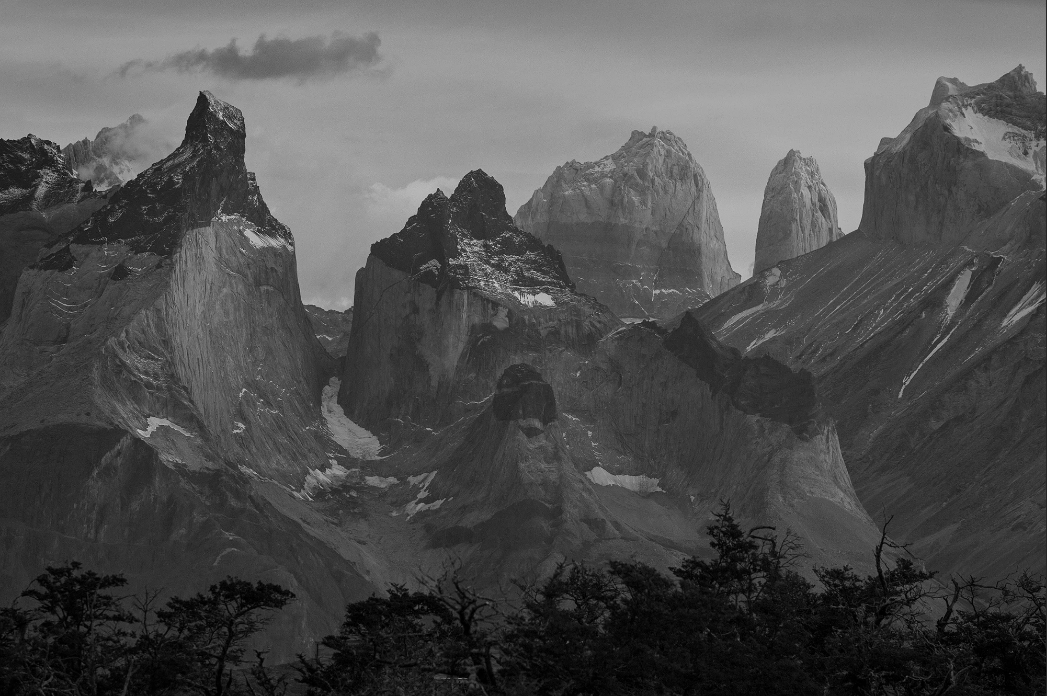

In [0]:
img = imread('home2.png',0)
cv2_imshow(img)

In [0]:
total_no_pixels = len(img)*len(img[0])
bits_per_pixel = len("{0:b}".format(img.max()))
print("Bits per pixel of uncompressed image : {0} bits".format(bits_per_pixel))
print("Image  Size  of  uncompressed  image : {0} bits".format(bits_per_pixel*total_no_pixels))

Bits per pixel of uncompressed image : 8 bits
Image  Size  of  uncompressed  image : 5829696 bits


In [0]:
compressed_img = np.zeros((len(img),len(img[0])), dtype=int)

prev_lsb = "0000"

for x in range(len(img)):
    for y in range(len(img[0])):
        
        binary_repr = "{0:08b}".format(img[x][y])
        msb, lsb = binary_repr[:4], binary_repr[4:] 
        
        if msb != "1111":
            lsb_sum = (bin(int(prev_lsb, 2) + int(lsb, 2)))[2:]
            
            if len(lsb_sum) == 5:
                compressed_img[x][y] = int(msb, 2) + 1
                prev_lsb = lsb_sum[1:]
                
            else:
                compressed_img[x][y] = int(msb, 2)
                prev_lsb = lsb_sum   
                
        else:
            compressed_img[x][y] = int(msb, 2)
            prev_lsb = lsb
            

In [0]:
compressed_total_no_pixels = len(compressed_img)*len(compressed_img[0])
compressed_bits_per_pixel = len("{0:b}".format(compressed_img.max()))
print("Bits per pixel of compressed image : {0} bits".format(compressed_bits_per_pixel))
print("Image  Size  of  compressed  image : {0} bits".format(compressed_bits_per_pixel*compressed_total_no_pixels))

Bits per pixel of compressed image : 4 bits
Image  Size  of  compressed  image : 2914848 bits


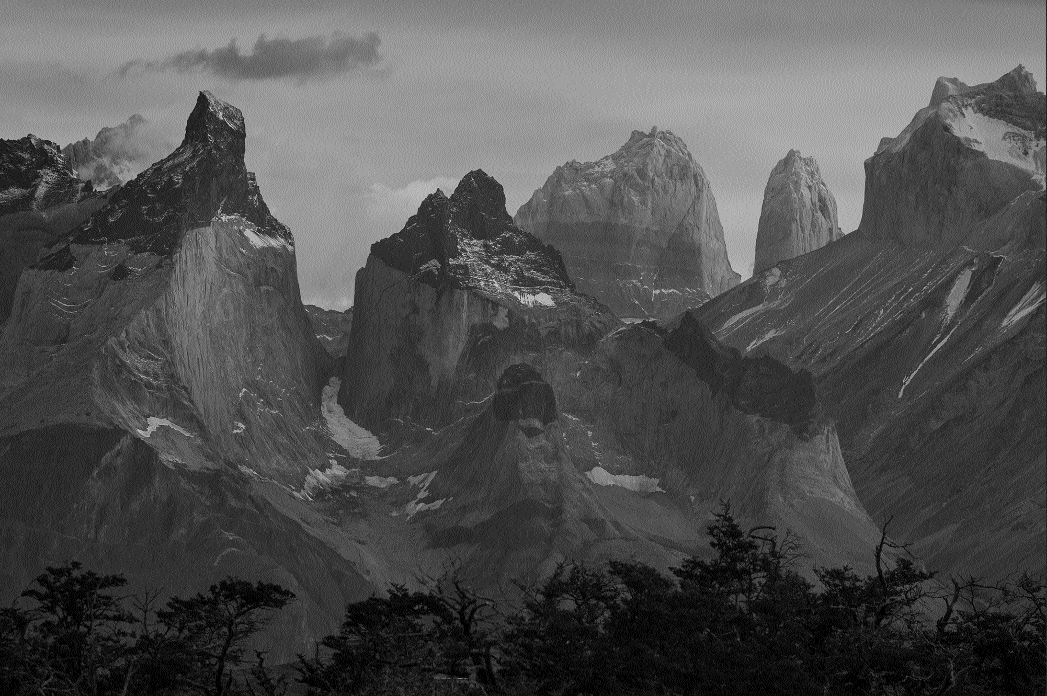

In [0]:
decompression_multiplier = 2**(bits_per_pixel - compressed_bits_per_pixel)
cv2_imshow(np.array(compressed_img)*decompression_multiplier)

# **Compression Ratio**

In [0]:
compression_ratio = (compressed_bits_per_pixel/bits_per_pixel)*100

print("Compression Ratio of Image : {0}%".format(compression_ratio))

Compression Ratio of Image : 50.0%


# **Signal to Noise Ratio**

In [0]:
signal = 0

noise = 0

for x in range(len(img)):
    for y in range(len(img[0])):
        
        signal += img[x][y]**2
        noise += (img[x][y]-compressed_img[x][y]*decompression_multiplier)**2
        
snr = signal/noise

print("Signal to Noise Ratio of Image : {0}".format(snr))

Signal to Noise Ratio of Image : 197.75744325658826


# **Mean Square Error**

In [0]:
mse = noise/total_no_pixels
print("Mean Square Error of Image : {0}".format(mse))

Mean Square Error of Image : 43.29418618054869


# **Peak Signal to Noise Ratio**

In [0]:
peak_signal_value = int("1"*bits_per_pixel,2)

psnr = (peak_signal_value**2)/mse

print("Peak Signal to Noise Ratio : {0}".format(psnr))

Peak Signal to Noise Ratio : 1501.9337637813037


## **Conclusio**n

#### Thus we have successfully implemented the IGS Algorithm to the image and compressed it and decompressed it

#### IGS has a very high compression rate, but provides high noise as well

#### Thus IGS is a lossy compression with pros and cons